<a href="https://colab.research.google.com/github/opassos/LetsCode/blob/main/Exercicio_Kmeans_(numpy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def cdist(XA, XB):
    diff = (np.expand_dims(XA, 1) - np.expand_dims(XB, 0))
    return (diff ** 2).sum(axis = -1)**0.5

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class KMeans():
    def __init__(self, n_clusters = 8, max_iter = 300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    @staticmethod
    def __init_centers__(X, K):
        ids = np.random.choice(range(len(X)), K, replace=False)
        return X[ids]

    @staticmethod
    def __step1__(X, C):
        dist = cdist(X, C)
        return dist.argmin(axis = 1)

    @staticmethod
    def __step2__(X, clusters):
        clusters = [X[np.where(clusters == c)].mean(axis = 0) for c in np.unique(clusters)]
        return np.array(clusters)

    def fit(self, X):
        self.X = X
        self.cluster_centers = self.__init_centers__(X, self.n_clusters)
        for i in range(self.max_iter):
            self.labels = self.__step1__(X, self.cluster_centers)
            self.cluster_centers = self.__step2__(X, self.labels)

    def predict(self, X):
        return self.__step1__(X, self.cluster_centers)

    def show(self):
        plt.scatter(*self.X.T, c = self.labels)
        plt.scatter(*self.cluster_centers.T, marker = 'x', color = 'red');


In [3]:
X = np.random.randn(200, 2)

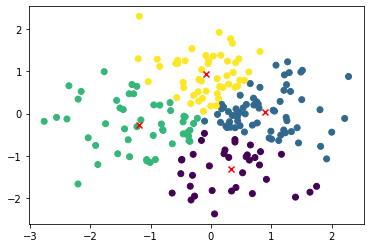

In [4]:
kmeans = KMeans(n_clusters = 4, max_iter = 100)
kmeans.fit(X)
kmeans.show()

In [5]:
kmeans.predict(X)

array([1, 1, 3, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 3, 3, 1, 3, 0, 2, 1, 3,
       2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 3, 1, 1, 2, 1, 0, 1, 1, 1, 3, 3, 1, 1, 3, 1, 2, 3, 3, 1, 2,
       1, 0, 0, 3, 1, 1, 3, 0, 3, 3, 2, 2, 3, 3, 3, 1, 0, 1, 2, 0, 1, 3,
       1, 3, 2, 1, 2, 3, 3, 3, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 3, 0, 3, 1,
       1, 3, 1, 1, 1, 1, 0, 2, 2, 2, 3, 3, 0, 0, 0, 3, 2, 2, 2, 3, 1, 2,
       2, 2, 2, 1, 1, 3, 3, 2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 3,
       1, 1, 0, 1, 3, 1, 0, 2, 0, 0, 1, 1, 1, 3, 2, 2, 1, 3, 3, 3, 2, 0,
       3, 3, 3, 0, 3, 3, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 3, 1, 3, 3, 1, 3,
       2, 0])

In [6]:
kmeans.cluster_centers

array([[ 0.32383117, -1.32255884],
       [ 0.89193359,  0.04319016],
       [-1.18998968, -0.26451137],
       [-0.07978196,  0.93582015]])